# Файл с результатами Загрузки данных, получения описательных характеристик, а также препроцессинга (подготовки данных к анализу)

In [1]:
import pandas as pd
import re as re

In [2]:
data_dir='.\\data\\'
file_name='Ec_Bu__be_p1_p2_filtered2.csv'

#header=['_id', 'authors', 'fieldsOfStudy', 'id', 'inCitations', 'journalName', 'outCitations', 'paperAbstract', 'title','year']

table = pd.read_csv(data_dir+file_name, delimiter=',', quotechar='"', error_bad_lines=False, engine='python')
table

,_id,authors,fieldsOfStudy,id,inCitations,journalName,outCitations,paperAbstract,title,year,authors_name,authors_ids,List_outCitations,bigrams,tags,unigrams
0,6002e3eba8d76ef342e4a77a,"[{""name"":""Francesco Guala"",""ids"":[""2578268""]}]","[""Economics""]",ed8f68ce697510b8471c7b9666ddcd8dd377ca89,[],Journal of Economic Methodology,"[""69c2a5ea51a3fba2b24eec63c809a6c86a058e36"",""a...",Julian Reiss is one of a growing number of phi...,Theory-centrism in experimental economics,2011.0,Francesco_Guala,2578268,"69c2a5ea51a3fba2b24eec63c809a6c86a058e36, a5bb...","{fact_search, economist_shift, disagree_radica...",NaN,NaN
1,600318824db8a2e86becfa29,"[{""name"":""Marie Claire Villeval"",""ids"":[""49460...","[""Economics""]",bbdb5972c4bbf2e15a81f5f503d4c1215e286fe0,"[""2be748564a02430e80691e29fd51e8c0633a7711"",""7...",Behavioral & Experimental Economics,"[""5af62f2075ea936b8d712e96a18bccd5178d2c76"",""a...",Although economics has long been considered as...,"Experimental Economics: Contributions, Recent ...",2007.0,Marie_Claire_Villeval,4946038,"5af62f2075ea936b8d712e96a18bccd5178d2c76, a873...","{attempt_defining, experimental_economics, mai...",NaN,NaN
2,600318824db8a2e86becfa29,"[{""name"":""Marie Claire Villeval"",""ids"":[""49460...","[""Economics""]",bbdb5972c4bbf2e15a81f5f503d4c1215e286fe0,"[""2be748564a02430e80691e29fd51e8c0633a7711"",""7...",Behavioral & Experimental Economics,"[""5af62f2075ea936b8d712e96a18bccd5178d2c76"",""a...",Although economics has long been considered as...,"Experimental Economics: Contributions, Recent ...",2007.0,Marie_Claire_Villeval,4946038,"5af62f2075ea936b8d712e96a18bccd5178d2c76, a873...","{attempt_defining, experimental_economics, mai...",NaN,NaN
3,6002e41226c2fc31a3c19481,"[{""name"":""Francesco Guala"",""ids"":[""2578268""]}]","[""Economics""]",fbff2161300f044b75aededdfa3eab57fa001fde,"[""91007d2bb42771f4a82a6d0fb55133135d41cad3"",""8...",Economics and Philosophy,[],Controversies in economics often fizzle out un...,Artefacts in experimental economics: preferenc...,2000.0,Francesco_Guala,2578268,NaN,"{experimentalists_presented, controlled_experi...",NaN,NaN
4,6002ef28ec820ff467446107,"[{""name"":""Nicholas Bardsley"",""ids"":[""2770119""...","[""Economics""]",08bc6213cf71ac40ca6ec5753e37c13e515d6575,[],Journal of Economic Methodology,"[""7c8c8e67e8253462970bec011cf6bc3688d5ee0a"",""e...",We are grateful to the reviewers for their com...,"A response to Binmore, Harrison and Ross on Ex...",2011.0,Nicholas_Bardsley Chris_Starmer Robin_P._Cubit...,"2770119, 48938092, 34142296, 1969327, 29600304...","7c8c8e67e8253462970bec011cf6bc3688d5ee0a, e49c...","{relies_explicit, kind_work, non_experimental,...",NaN,NaN
5,6002f98b0aec0d32a5a4e9cd,"[{""name"":""Wang Jie"",""ids"":[""145451475""]}]","[""Economics""]",01e3372cee72a4d0b8ce493aafd1e3238d955c7d,[],NaN,[],There is a changing period in the development ...,Characteristics of Experimental Science of Che...,2010.0,Wang_Jie,145451475,NaN,"{ground_breaking, chenyun_economy, making_grou...",NaN,NaN
6,6002f240f5cd13c846827440,"[{""name"":""Charles R. Plott"",""ids"":[""2885567""]}]","[""Economics""]",4d8cee3d5a6262e60116a04ea1f506170bc91791,"[""9c35662abcd914e2ae9479dceac2a8773face7c8"",""6...",Southern Economic Journal,"[""057c3c93625caa6ecad2a5391ccaf171df7b6e52"",""2...",The expectations of the audience are rational ...,Will Economics Become an Experimental Science,1991.0,Charles_R._Plott,2885567,"057c3c93625caa6ecad2a5391ccaf171df7b6e52, 26bb...","{one_two, used_economics, provides_proper, exa...",NaN,NaN
7,6002e767729fa949b761b8ad,"[{""name"":""Christopher A. Sims"",""ids"":[""4625652...","[""Economics""]",e66d909c41884b12f4906c3c55b14bb6a04e58b8,"[""5480e3e62828409292a3d2fb1eafa7d2fc1b68b8"",""6...",Journal of Economic Perspectives,"[""5480e3e62828409292a3d2fb1eafa7d2fc1b68b8"",""9...","The fact is, economics is not an experimental ...",But Economics Is Not an Experimental Science,2010.0,Christopher_A._Sims,46256528,"5480e3e62828409292a3d2fb1eafa7d2

In [3]:
print "Число публикаций: ", table.shape[0]

Число публикаций:  37352


In [4]:
#Преобразование формата представления авторов
import re

def get_authors_name_only(text): 
    pattern='[\"][a-zA-ZÄ-ßÀ-ú.\s\-\']+[\"]'  # немецкий,португальский
    name=re.findall(pattern, text)
    listdel=['"name"', '"ids"']
    name=set(["_".join(x.split()) for x in name if x not in listdel])
    return " ".join(name)

def get_authors_ids_only(text): 
    pattern='\d+'  # немацкий,португальский
    name=re.findall(pattern, text)
    name_set=set(name)
    return ", ".join(name_set)

table['authors']=table['authors'].astype("string")

table['authors_name']=table['authors'].apply(lambda x : get_authors_name_only(x))
table['authors_name']=table['authors_name'].str.replace('"','',regex=True)

table['authors_ids']=table['authors'].apply(lambda x : get_authors_ids_only(x))

In [5]:
# Преобразование Списка литературы
def get_outCitations(text): 
    pattern='[a-z|A-Z|0-9]+'  
    ids=re.findall(pattern, text)
    return ", ".join(ids)

table['outCitations']=table['outCitations'].astype("string")
table['List_outCitations']=table['outCitations'].apply(lambda x : get_outCitations(x))

Основные описательные характеристики данных:

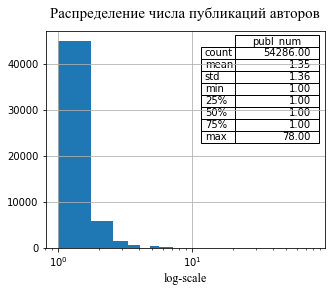

In [8]:
import itertools
import matplotlib.pyplot as plt
prep_dir='.\\preprocessed_results\\'
authors_list=table['authors_name'].to_list()

# формируем цельный лист всех авторов
single_authors_list=[x.split(' ') for x in authors_list]
all_authors=list(itertools.chain.from_iterable(single_authors_list))
# считаем частоты авторов
all_authors_df = pd.Series((a for a in all_authors))

fig, ax = plt.subplots(figsize=(5,4))

df_authors_counts=all_authors_df.value_counts(sort=True, ascending=False)[1:].rename_axis('authors').to_frame('publ_num')

ax=all_authors_df.value_counts(sort=True, ascending=False)[1:].hist(bins=100) #(bins=500) 
ax.set_xscale('log')
ax.set_xlabel(u'log-scale', fontname='Times New Roman', fontsize=12)
plt.title(u'Распределение числа публикаций авторов', fontsize=15, fontname='Times New Roman', y=1.03)

dfsummary = pd.DataFrame(df_authors_counts.publ_num.describe().apply("{0:.2f}".format))

t=plt.table(cellText=dfsummary.values,
      colWidths = [0.3]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      loc=1)
t.fontsize = 12
t.fontname='Times New Roman'
#plt.savefig(prep_dir+'Publ_numDist.png', dpi=150, bbox_inches = 'tight')

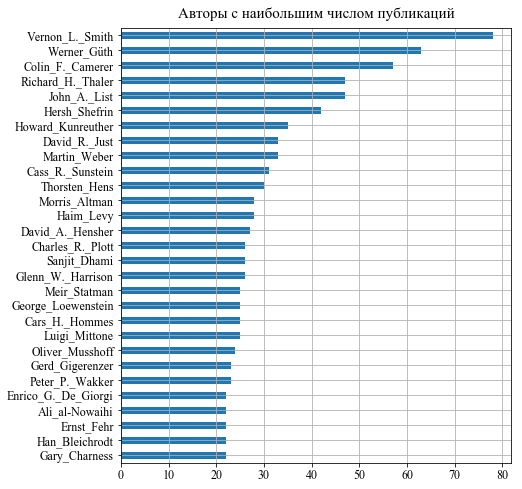

In [9]:
# ====График для авторов с наибольшим числом публикаций =====

ax=all_authors_df.value_counts(sort=True, ascending=False)[1:30].plot.barh(figsize=(7,8))
ax.invert_yaxis()
ax.set_title(u'Авторы с наибольшим числом публикаций', fontsize=15, fontname='Times New Roman', x=0.5, y=1.01)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)
ax.grid()
#plt.savefig(prep_dir+'Authors.png', bbox_inches = 'tight')

In [10]:
# Частоты публикаций по областям знаний
from collections import Counter
import math

table['fieldsOfStudy']=table['fieldsOfStudy'].astype("string")
table['fieldsOfStudy']=table['fieldsOfStudy'].str.replace("\"",'')
table['fieldsOfStudy']=table['fieldsOfStudy'].str.replace('[','')
table['fieldsOfStudy']=table['fieldsOfStudy'].str.replace(']','')

field_list=table['fieldsOfStudy'].tolist()
field_list_sort=[', '.join(sorted(x.split(','))) for x in field_list]
field_list_df = pd.Series((a for a in field_list_sort))
field_list_df.value_counts()[:20]

Economics                                   23048
Business                                    10258
Computer Science, Economics                  1022
Business, Computer Science                    509
Business, Medicine                            463
Economics, Medicine                           448
Economics, Psychology                         383
Business, Economics                           185
Economics, Sociology                          136
Economics, Political Science                  134
Business, Psychology                           81
Economics, Mathematics                         74
Business, Political Science                    68
Computer Science, Economics, Mathematics       63
Business, Sociology                            47
Business, Engineering                          38
Economics, Engineering                         36
Economics, Physics                             25
Economics, Medicine, Psychology                24
Economics, Geography                           23


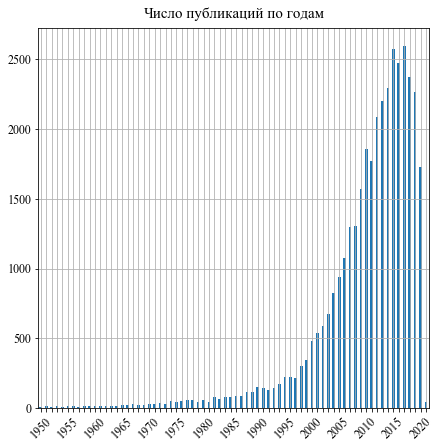

In [11]:
# Число публикаций по годам
import numpy as np
#table['year'] = table['year'].dt.strftime('%Y')
prep_dir='.\\preprocessed_results\\'
table['year'] = table['year'].fillna(0)
table['year'] = table['year'].astype('int')


ax=table['year'].loc[table['year']>=1950].sort_values(ascending=True).value_counts().sort_index().plot.bar(figsize=(7,7))
plt.setp(ax.axes.get_xticklabels(), visible=False)
plt.setp(ax.axes.get_xticklabels()[::5], visible=True)
plt.xticks(rotation=45)
ax.set_title(u'Число публикаций по годам', fontsize=15, fontname='Times New Roman', x=0.5, y=1.01)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)
    
plt.grid()
#plt.savefig(prep_dir+'Year.png', bbox_inches = 'tight')

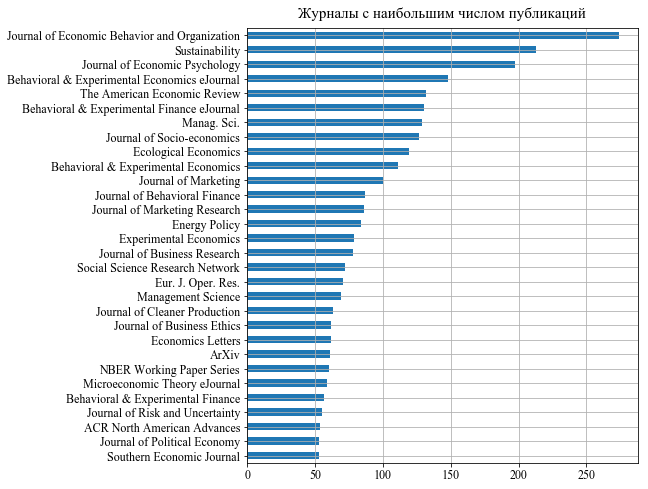

In [12]:
# Журналы с наибольшим числом публикаций
ax=table.journalName.value_counts(sort=True, ascending=False)[0:30].plot.barh(figsize=(7,8))
ax.invert_yaxis()
ax.set_title(u'Журналы с наибольшим числом публикаций', fontsize=15, fontname='Times New Roman', x=0.5, y=1.01)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(12)
ax.grid()
#plt.savefig(prep_dir+'Journals.png', bbox_inches = 'tight')

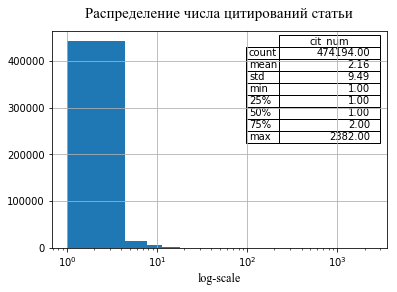

In [13]:
# ===  Самые цитируемые статьи  ===

# формируем цельный лист всех ссылок
cit_list=table['List_outCitations'].to_list()
single_cit_list=[x.split(' ') for x in cit_list]
all_cit=list(itertools.chain.from_iterable(single_cit_list))
# считаем частоты авторов
all_cit_df = pd.Series((a for a in all_cit))
all_cit_df.value_counts()

df_cit_counts=all_cit_df.value_counts(sort=True, ascending=False)[1:].rename_axis('authors').to_frame('cit_num')

ax=all_cit_df.value_counts(sort=True, ascending=False)[1:].hist(bins=700) #(bins=500) 
ax.set_xscale('log')
ax.set_xlabel(u'log-scale', fontname='Times New Roman', fontsize=12)
plt.title(u'Распределение числа цитирований статьи', fontsize=15, fontname='Times New Roman', y=1.03)

dfsummary = pd.DataFrame(df_cit_counts.cit_num.describe().apply("{0:.2f}".format))

t=plt.table(cellText=dfsummary.values,
      colWidths = [0.3]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      loc=1)
t.fontsize = 12
t.fontname='Times New Roman'
#plt.savefig(prep_dir+'Cit_numDist.png', dpi=150, bbox_inches = 'tight')

In [14]:
# Печать кодов наиболее цитируемых публикаций
all_cit_df.value_counts()[1:21].keys().tolist()

['05abdc87bcaf2963fd511672e64ab39d02239aaf,',
 '3cef3fc08b6188197eb470d3a0950bdf8999ce49,',
 '38825d4f600ceb71825eca070543f7ebb3cfc7eb,',
 '9b129513de0da471a204b953528c437e4a4c30ef,',
 'dbdb10f066b857baa6e129f49b8d832c3f6267ae,',
 'e552054dbd030b8414058639389b4a63e727aedb,',
 'd8237600841361f7811f5fd9effaed9d2e6e34b0,',
 'fc20d1e55a13dff9aaaba3fe57d64fc55fe9f404,',
 'fbadde2bf6e2b657dc81c5453f920a979d6967f7,',
 '88419b9475a32f4dac1d603976dfda2adeffb594,',
 '38ce98b56d96b2c9961202ac2c2c806358813099,',
 '44eab3013cb6c63a534570994c9cffe3935ec7ed,',
 '86af5b4ce3324624bbb499eb79ee0901d6375df9,',
 '2d28a52e59005b2d3e23c9366be880a960dc1eaf,',
 '30c40f8c16848fa14540ef47afe0cc8b381b1ff9,',
 '05018954ec8b2c1add86bae8f9932ea5908c0c52,',
 'c2317d524ed078d5304f0154a818b0ca7d5d3ebb,',
 '99a25a97b0bcea597debb758b030556bb19055a1,',
 '830f43ab71d471f4ca532dbd2b0d9ccd46f559a5,',
 'c60dcb940982cda2de197d58befd6b62a1d30947,']

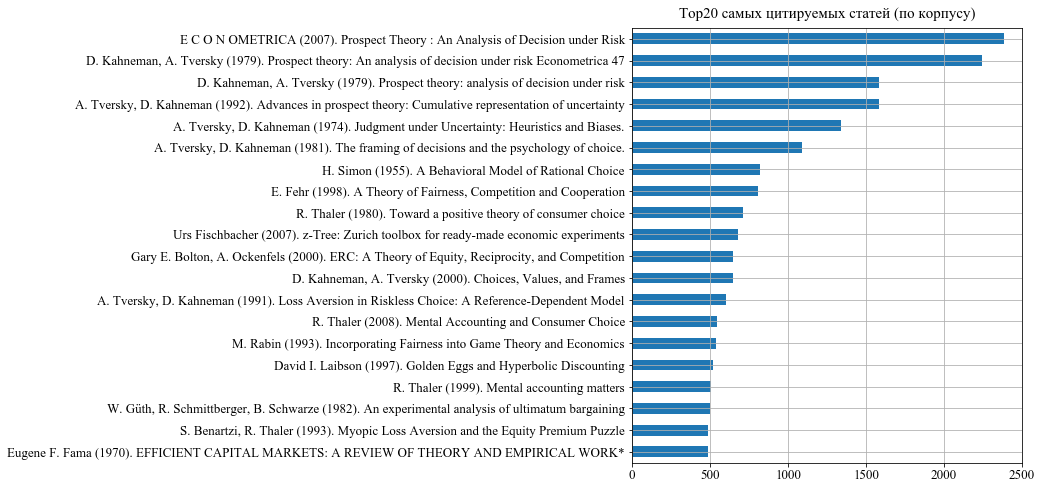

In [15]:
# ! Для поиска названия публикации по ее коду необходимо запустить специальный скрипт, выполняемый в 3 версии Python (см. файл ...)
# Ниже скопированы результаты, полученные при выполнения отдельно запускаемого скрипта 
articles_list=['E C O N OMETRICA (2007). Prospect Theory : An Analysis of Decision under Risk',
 'D. Kahneman, A. Tversky (1979). Prospect theory: An analysis of decision under risk Econometrica 47',
 'D. Kahneman, A. Tversky (1979). Prospect theory: analysis of decision under risk',
 'A. Tversky, D. Kahneman (1992). Advances in prospect theory: Cumulative representation of uncertainty',
 'A. Tversky, D. Kahneman (1974). Judgment under Uncertainty: Heuristics and Biases.',
 'A. Tversky, D. Kahneman (1981). The framing of decisions and the psychology of choice.',
 'H. Simon (1955). A Behavioral Model of Rational Choice',
 'E. Fehr (1998). A Theory of Fairness, Competition and Cooperation',
 'R. Thaler (1980). Toward a positive theory of consumer choice',
 'Urs Fischbacher (2007). z-Tree: Zurich toolbox for ready-made economic experiments',
 'Gary E. Bolton, A. Ockenfels (2000). ERC: A Theory of Equity, Reciprocity, and Competition',
 'D. Kahneman, A. Tversky (2000). Choices, Values, and Frames',
 'A. Tversky, D. Kahneman (1991). Loss Aversion in Riskless Choice: A Reference-Dependent Model',
 'R. Thaler (2008). Mental Accounting and Consumer Choice',
 'M. Rabin (1993). Incorporating Fairness into Game Theory and Economics',
 'David I. Laibson (1997). Golden Eggs and Hyperbolic Discounting',
 'R. Thaler (1999). Mental accounting matters',
 'W. Güth, R. Schmittberger, B. Schwarze (1982). An experimental analysis of ultimatum bargaining',
 'S. Benartzi, R. Thaler (1993). Myopic Loss Aversion and the Equity Premium Puzzle',
 'Eugene F. Fama (1970). EFFICIENT CAPITAL MARKETS: A REVIEW OF THEORY AND EMPIRICAL WORK*']

df_articles = pd.DataFrame((list(zip(articles_list, all_cit_df.value_counts().values[1:22].tolist()))) )
df_articles.columns=['article', 'counts']
all_cit_df.value_counts().values[1:20]

df_articles.set_index('article', inplace=True)
ax=df_articles.plot.barh(figsize=(7,8))
ax.invert_yaxis()
ax.set_title(u'Top20 самых цитируемых статей (по корпусу)', fontsize=15, fontname='Times New Roman', x=0.5, y=1.01)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
    label.set_fontsize(13)
ax.grid()
plt.ylabel("")
plt.xlabel("")
ax.get_legend().remove()
#plt.savefig(prep_dir+'CitedArticles.png', bbox_inches = 'tight')

# Препроцессинг

In [17]:
# Лемматизация, фильтрация, процедура формирования униграмм и биграмм с указанием частоты

from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from itertools import chain
stop_file='stop_words.txt'
import pandas as pd

data_dir='.\\data\\'

tokenizer = RegexpTokenizer(u'[a-z|A-Z|]+') # only words  
lemmatizer = WordNetLemmatizer()

# merge two set of stop words
stop_words = set(stopwords.words('english')) 
esw = open(data_dir+stop_file, "r").read().decode('utf-8').split()
esw=set(esw)
full_stop_words=set(chain(stop_words,esw))

white_unigrams=set(['nudge', 'nudging', 'framing'])

def text_preprocess(plain_text):
    intermediate = tokenizer.tokenize(plain_text.lower())
    lemmatized = [lemmatizer.lemmatize(w) for w in intermediate]
    preprocessed_text = [i for i in lemmatized if i not in full_stop_words] 
    return preprocessed_text

def get_counted_unigrams(preprocessed_text):
    counts_uni = Counter(preprocessed_text)  # счетчик частот униграмм  
    unigrams_count_line='' # unigrams in line with counts
    unigram_tags_count_line=''
    unigram_tags=[]
    for char in counts_uni.keys():
        unigrams_count_line=unigrams_count_line+char +':'+str(counts_uni[char])+' '
        if (char in white_unigrams): #& (counts_uni[char]>=3):
            unigram_tags.append(char)
            unigram_tags_count_line=unigram_tags_count_line+char+':'+str(counts_uni[char])+' '
            
    uniword='|||'.join(preprocessed_text)       
    return uniword, unigrams_count_line, unigram_tags, unigram_tags_count_line

stop_list=set(['et_al', 'e_g', 'de_los', 'de_la', 'case_study', 'p_p',
               'main_result', 'study_provides', 'research_question', 'better_understanding', 'per_cent', 
               'per_caput', 'de_l', 'en_el', 'en_la', 'n_de', 'f_r', 'sur_le', 'dans_le', 'r_e',
              'result_show',
              'decision_maker',
              'result_suggest',
              'united_state',
               'making_process',
               'result_indicate',
               'research_ha',
               'future_research',
               'ha_become',
               'methodology_approach',
               'important_role',
               'cognitive_dissonance'         
              ])


def get_counted_bigrams(preprocessed_text, unigram_tags, unigram_tags_count_line):
    
    bigramm_cutoff_value=1
    bigrams_count_line='' # bigrams in line with counts
    biword_list =  ['_'.join(b) for b in nltk.bigrams(preprocessed_text)]
    biword =  "|||".join(biword_list+unigram_tags)
    fdist = nltk.FreqDist(biword_list)
    bigrams_count_line='' # bigrams in line with counts
    #bigrams_tags=''
    for word, word_count in fdist.items():
#         if word_count>=3:
#             bigrams_tags=bigrams_tags+word + ' '
        if word not in stop_list:
            bigrams_count_line=bigrams_count_line+ word +':' +str(word_count) +' '
    line=bigrams_count_line+unigram_tags_count_line
  
    return biword, line  #, bigrams_tags

In [ ]:
# Выполнение процедур, сохрание данных в формате .vpw (Ec_Bu__be_vpw.txt), сохранение таблицы данных с униграммами и бишраммами
import io
vpw_name='Ec_Bu__be_vpw.txt'

table['title']=table['title'].astype("string")
table['authors_name']=table['authors_name'].astype("string")
table['List_outCitations']=table['List_outCitations'].astype("string")
table['title'] = table['title'].replace(np.nan, '', regex=True)
table['paperAbstract']=table['paperAbstract'].astype("string")
table['paperAbstract'] = table['paperAbstract'].replace(np.nan, '', regex=True)
table['bigrams']=""
bigrams_list=[]

with io.open(data_dir+vpw_name, 'w', encoding='utf8') as vpw_lemmas_file:  #file to write
    
    for index, row in table.iterrows():
        
        title_abstract=row['title']+ ' '+ row['paperAbstract']
        preprocessed_text=text_preprocess(title_abstract)
        
        if len(preprocessed_text)>1:
            
            uniword, titleAndAbstract_unigrams_count_line, unigram_tags, unigram_tags_count_line = get_counted_unigrams(preprocessed_text)
            biword, titleAndAbstract_bigrams_count_line= get_counted_bigrams(preprocessed_text, unigram_tags, unigram_tags_count_line)
            
            bigrams_list.append(biword)

            List_outCitations=[cit.strip() for cit in row['List_outCitations'].split(',') if len(cit.strip())>0] # len(cit.strip())>0 - т.к. есть пустые ''
 
            new_line=row['_id'] +' |authors ' + row['authors_name'].decode('utf8') + ' |text ' + titleAndAbstract_unigrams_count_line + '|bigrams ' + titleAndAbstract_bigrams_count_line + '|references ' + ' '.join(List_outCitations)
            vpw_lemmas_file.write(unicode(new_line))
            vpw_lemmas_file.write(unicode('\n'))
            if index in [10, 100, 500, 1000, 5000, 10000, 50000, 70000, 100000, 120000, 150000]:
                print 'done :', str(index)

table['bigrams']=bigrams_list
table.to_csv(data_dir+'Ec_Bu__be_p1_p2_filtered_preprocessed2.csv', encoding='utf-8', index=False)